___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Forecasting Exercises
This exercise walks through a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset.<br>
This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [2]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")



So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

In [4]:
# Load datasets
df = pd.read_csv('./UDEMY_TSA_FINAL/Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

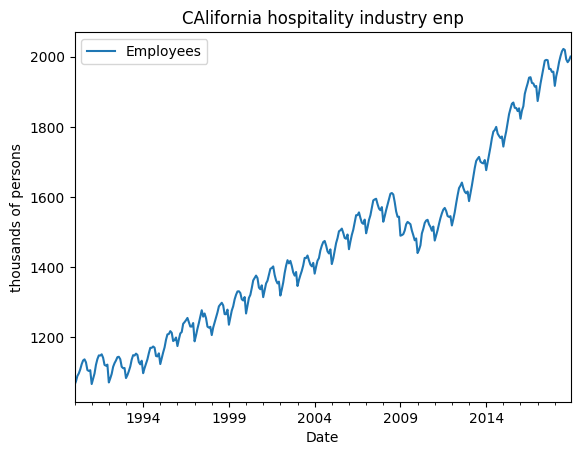

In [7]:
## CODE HERE
df.plot(title="CAlifornia hospitality industry enp",ylabel="thousands of persons");

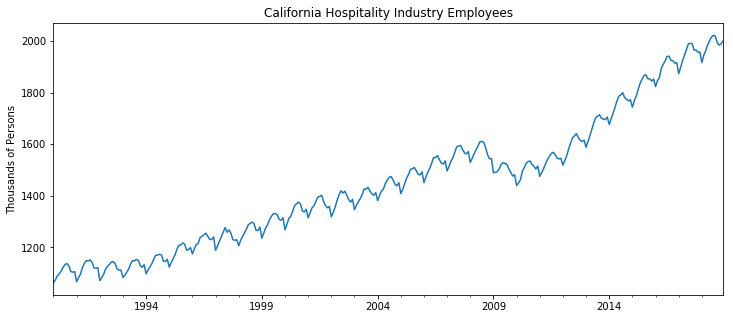

In [2]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

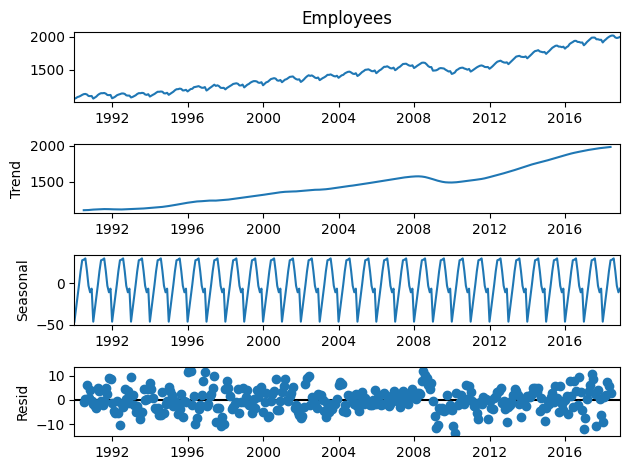

In [8]:
result1=seasonal_decompose(df["Employees"],model="additive")
result1.plot();

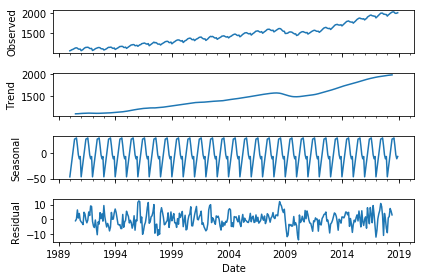

In [3]:
# DON'T WRITE HERE

### 3. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [26]:
auto_arima(df["Employees"],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Fri, 21 Jul 2023   AIC                           2208.504
Time:                                      00:36:31   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.521      0.000       0.836       1.013
ma.L1         -0.9440      0.069    -13.586      0.000      -1.080      -0.808
ma.L2          0.1288      0.060      2.158      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    704.467      0.000       0.994       1.000
ma.S.L12      -0.7491      0.043    -17.313      0.000      -0.834      -0.664
sigma2        29.2986      1.716     17.071      0.000      25.935      32.663
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
stepwise_model = auto_arima(df["Employees"], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2106.518, Time=1.85 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2246.010, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2176.292, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2128.520, Time=0.46 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2247.666, Time=0.18 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=2108.088, Time=1.73 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2108.053, Time=3.30 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2177.238, Time=0.53 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=2110.175, Time=5.72 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2128.260, Time=0.40 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=2102.738, Time=1.14 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=2243.066, Time=0.26 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=2104.231, Time=1.44 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=2104.200, Time=2.98 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=2156.820, Time=0.67

In [4]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.664
Date:                            Wed, 27 Mar 2019   AIC                           2277.328
Time:                                    13:12:10   BIC                           2292.726
Sample:                                         0   HQIC                          2283.459
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0477      0.292     -0.163      0.870      -0.620       0.524
ar.S.L12       0.5291      0.040     13.286      0.000       0.451       0.607
ar.S.L24       0.4303      0.041     10.453      0.000       0.350       0.511
sigma2        37.2952      2.157     17.294      0.000      33.068      41.522
===================================================================================
Ljung-Box (Q):                       99.53   Jarque-Bera (JB):                51.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order of (0,1,0) combined with a seasonal order of (2,0,0,12).
### 4. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [18]:
nobs=12
train=df.iloc[:-nobs]
test=df.iloc[-nobs:]
train.shape, test.shape

((336, 1), (12, 1))

In [5]:
# DON'T WRITE HERE

### 5. Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [35]:
model=SARIMAX(train["Employees"],order=(0,1,0),seasonal_order=(2,0,0,12),enforce_invertibility=False)
result1=model.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Fri, 21 Jul 2023   AIC                           2196.814
Time:                                    01:16:31   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
model=SARIMAX(train["Employees"],order=(2,1,1),seasonal_order=(0,1,1,12),enforce_invertibility=False)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1006.198
Date:                            Fri, 21 Jul 2023   AIC                           2022.396
Time:                                    00:39:59   BIC                           2041.285
Sample:                                01-01-1990   HQIC                          2029.936
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7611      0.092      8.311      0.000       0.582       0.941
ar.L2          0.1675      0.068      2.473      0.013       0.035       0.300
ma.L1         -0.7974      0.067    -11.897      0.000      -0.929      -0.666
ma.S.L12      -0.7529      0.043    -17.565      0.000      -0.837      -0.669
sigma2        28.8646      1.701     16.968      0.000      25.531      32.199
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                70.63
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.09
Prob(H) (two-sided):                  0.42   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### AIC is lower for (1,1,2)(0,1,1)  

In [6]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 27 Mar 2019   AIC                           2196.814
Time:                                    13:12:24   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Obtain predicted values

In [34]:
len(train),len(test), len(df)

(336, 12, 348)

In [37]:
predictions=results.predict(start=len(train),end=len(test)+len(train)-1,dynamic=False).rename('SARIMA(2,1,1)(0,1,1,12) Predictions')

<AxesSubplot:xlabel='Date'>

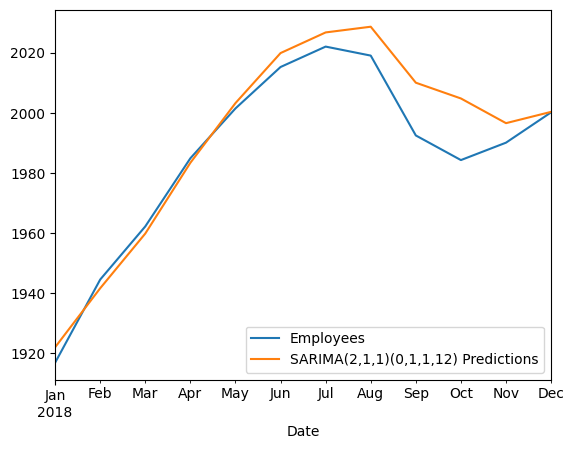

In [41]:
test["Employees"].plot(legend=True)
predictions.plot(legend=True)

In [44]:
predictions1=result1.predict(start=len(train),end=len(test)+len(train)-1,dynamic=False).rename('SARIMA(0, 1, 0)x(2, 0, 0, 12) Predictions')

<AxesSubplot:xlabel='Date'>

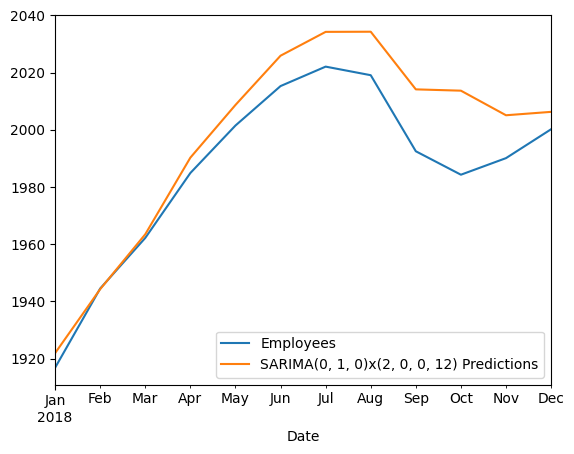

In [45]:
test["Employees"].plot(legend=True)
predictions1.plot(legend=True)

In [7]:
# DON'T WRITE HERE

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

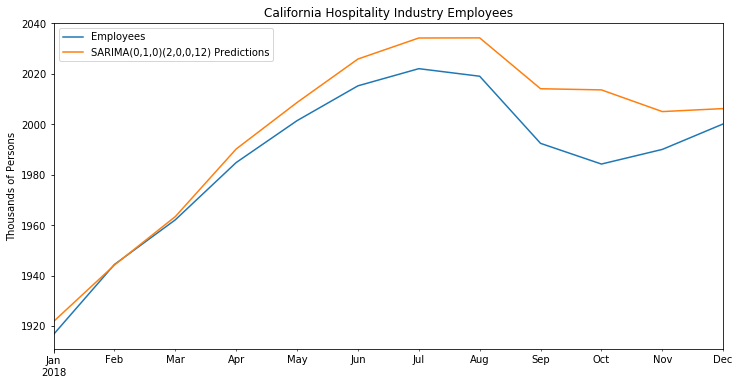

In [8]:
# DON'T WRITE HERE

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [54]:
error1=mean_squared_error(test["Employees"],predictions)

error2=mean_squared_error(test["Employees"],predictions1)



rmseerror=rmse(test["Employees"],predictions)
rmseerror1=rmse(test["Employees"],predictions1)

error1, error2, rmseerror, rmseerror1


(182.8506729280925, 182.8506729280925, 13.522228844687273, 13.522228844687273)

In [9]:
# DON'T WRITE HERE

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Retrain the model on the full data and forecast one year into the future

In [55]:
fcast=results.predict(start=len(train),end=len(test)+len(train)-1+12).rename('SARIMA(2,1,1)(0,1,1,12) Predictions')

<AxesSubplot:xlabel='Date'>

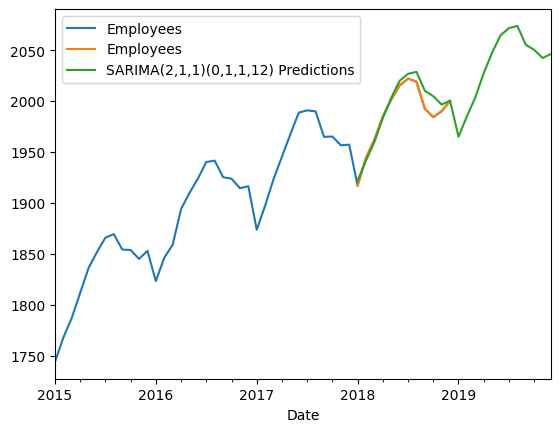

In [59]:
df.iloc[-48:].plot(legend=True)
test["Employees"].plot(legend=True)
fcast.plot(legend=True)

<AxesSubplot:xlabel='Date'>

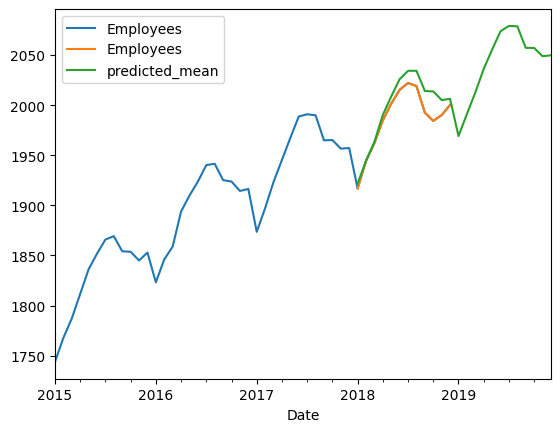

In [60]:
fcast2=result1.predict(start=len(train),end=len(test)+len(train)-1+12)
df.iloc[-48:].plot(legend=True)
test["Employees"].plot(legend=True)
fcast2.plot(legend=True)

In [10]:
# DON'T WRITE HERE

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

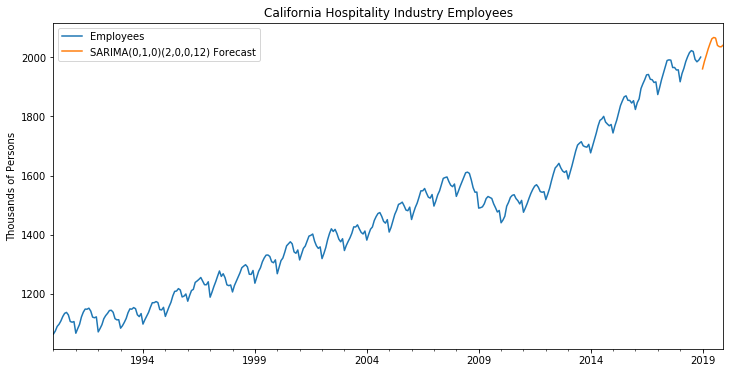

In [11]:
# DON'T WRITE HERE

## Great job!